In [25]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d

In [26]:
def wave_data(x_rng = [0, 12], y_rng = [0, 10], tot_point = 50, zh = 5, axis = 'x'):
    x = np.linspace(x_rng[0], x_rng[1], tot_point)
    y = np.linspace(y_rng[0], y_rng[1], tot_point)
    X, Y = np.meshgrid(x, y)
    if axis.lower() == 'x': Z = zh + np.sin(X)
    if axis.lower() == 'y': Z = zh + np.sin(Y)
    if axis.lower() == 'both': Z = zh + np.sin(X) + np.sin(Y)
    return [X, Y, Z]

In [27]:
def plot_wave(changeable, data, fig, xsc = [.95], ysc = [.95], el = [.8]):
    i = changeable[0]
    ang = changeable[1]
    if len(xsc) != len(el): el += [.8 for _ in range(len(xsc) - len(el))]
    ax = fig.add_subplot(1,1,1, projection = '3d')
    ax.plot_surface(data[i][0], data[i][1], data[i][2], cmap = 'Spectral', zorder = 10)
    for j in range(len(xsc)):
        x = int(data[i][0][0].shape[0] * xsc[j])
        y = int(data[i][1][0].shape[0] * ysc[j])
        ax.scatter(data[i][0][x, y], data[i][1][x, y], data[i][2][x, y] + el[j], s = 500, color = 'darkcyan',
                   zorder = 10  + 10 * (j + 1))
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    ax.view_init(ang[0], ang[1])

In [44]:
tot_frame = 80
axis = 'x'
sc_point = 0

In [45]:
init_x = [0, 12, .2]
init_y = [0, 10, .1]
tot_point = 40
zh = 5

sc = np.random.rand(sc_point, 2)
xsc = sc[:, 0]
ysc = sc[:, 1]
el = np.linspace(.2, .8, sc_point)

In [46]:
frames = [[i, [10 + i * .5, 30 + i * 1.2]] for i in range(tot_frame)]
data = [wave_data([init_x[0] + i * init_x[2], init_x[1] + i * init_x[2]],
                  [init_y[0] + i * init_y[2], init_y[1] + i * init_y[2]], tot_point, zh, axis = axis) 
        for i in range(tot_frame)]

In [47]:
# %matplotlib inline
# fig = plt.figure(figsize = (10, 6))
# plot_wave(frames[0], data, fig)
# plt.show()
# plt.close()

<IPython.core.display.Javascript object>


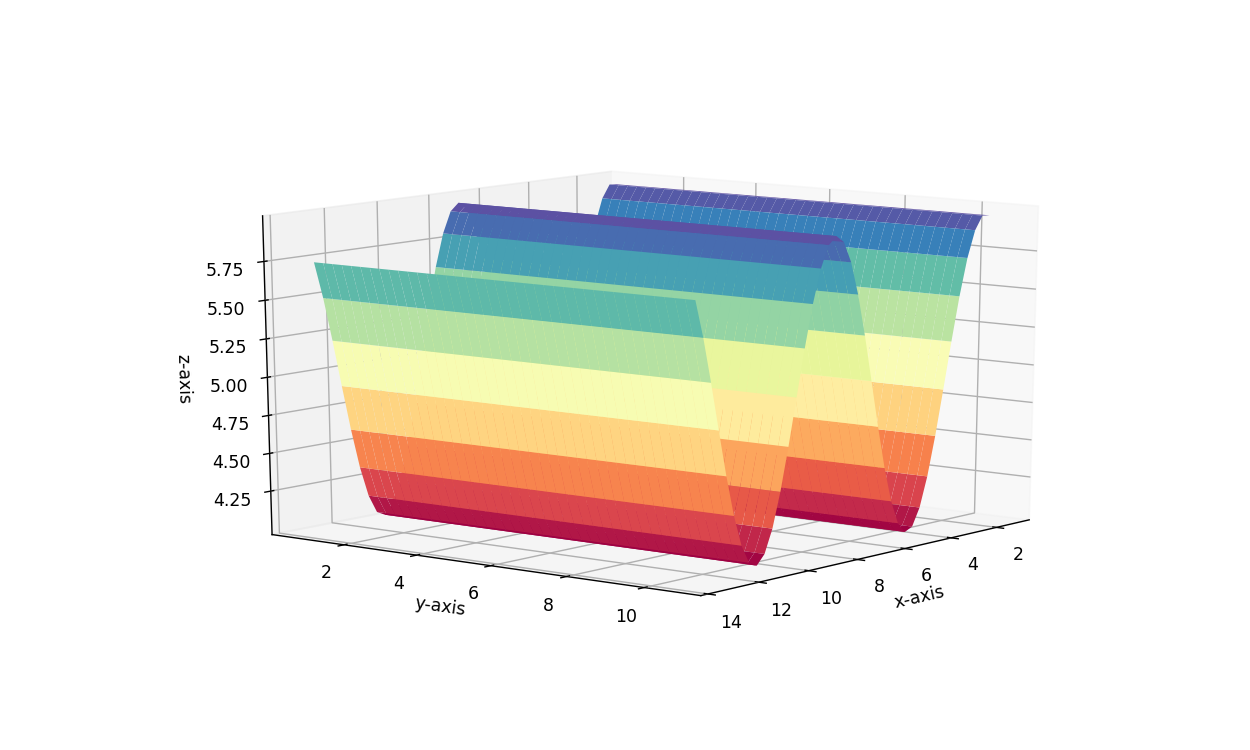

In [48]:
%matplotlib notebook
fig = plt.figure(figsize = (10, 6))
anim = FuncAnimation(fig = fig, func = plot_wave, frames = frames,
                     fargs = (data, fig, xsc, ysc, el), repeat = False, blit = False)

In [49]:
writer = animation.FFMpegWriter(fps=10, metadata = {"title" : "Wave animation using matplotlib"})
anim.save("wave_animation_along_%s_axis_with_%s_points.mp4"%(axis, sc_point), writer = writer)

In [70]:
def hill_data(x_rng = [0, 12], y_rng = [0, 10], tot_point = 50, zh = 5, axis = 'x'):
    x = np.linspace(x_rng[0], x_rng[1], tot_point)
    y = np.linspace(y_rng[0], y_rng[1], tot_point)
    X, Y = np.meshgrid(x, y)
    Z = np.array([np.log(x / x[-1] * i + 1) for i in x])
    Z = Z + np.random.randint(0, 10, Z.shape) / 10
    return X, Y, Z

In [71]:
X, Y, Z = hill_data()
print(X.shape, Y.shape, Z.shape)

(50, 50) (50, 50) (50, 50)


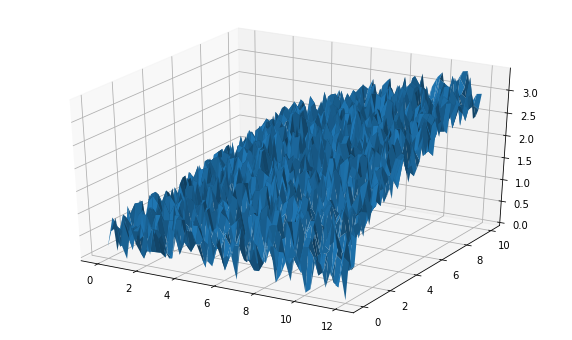

In [72]:
%matplotlib inline
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.plot_surface(X, Y, Z)
plt.show()